In [1]:
import os
import sys
import glob
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import biosppy
from biosppy.signals import ecg
from scipy import signal
import pyhrv
import pyhrv.tools as tools
import pyhrv.time_domain as td

# import matplotlib as mpl
# # %matplotlib
# mpl.use('TkAgg')

In [2]:
# current work directory
path = os.path.abspath(os.getcwd())
print('경로:',path)
# directory file list
file_list = glob.glob(path+ '/*')

# 데이터 시간, 인덱스, ppg 센서 3개, ambient 센서, 수동 입력 marker
##(중요) ppg 처리 로직 있는지 확인 중!!!!!!!!
## marker는 지금 없음!
VERITY_COL = ['time', 'idx', 'ppg0', 'ppg1', 'ppg2', 'ambient', 'marker']
# 심박 ecg 센서
H10_COL = ['time', 'idx', 'sensor', 'marker']

경로: /home/pilab/workspace/test


In [3]:
# def file_search(path):
#     '''
#         Mast, Resting csv 파일 찾는 함수
#         path = 현재 작업 디렉토리 절대 위치
        
#         파일 명명 로직:(F)_subject_day_time_sensor
#     '''
#     try:
#         filenames = os.listdir(path)
#         for filename in filenames:
#             full_filename = os.path.join(path, filename)
#             if filename == 'Mast':
#                 file_list_mast = sorted([f for f in os.listdir(full_filename) if f.startswith('(M)')])
#             elif filename == 'Resting':
#                 file_list_resting = sorted([f for f in os.listdir(full_filename) if f.startswith('(H)')])
#             else:
#                 pass 
#         return file_list_mast, file_list_resting
#     except PermissionError:
#         print('file search fail')
#         pass
# file_list_mast, file_list_resting = file_search(path)

In [4]:
# print(file_list_mast, file_list_resting)

In [5]:
# def listing(file_list):
#     '''
#         기기 별 csv 파일 찾는 함수
#         기기 별로 찾아야 할지, 피험자 별로 찾아야할지 아직 모르겠음, 둘다 해야겠지?
        
#         파일 명명 로직:(F)_subject_day_time_sensor
#     '''
#     # polar sensor data list
#     file_list_h10 = sorted([f for f in file_list if f.endswith('H10.csv')])
#     file_list_verity = sorted([f for f in file_list if f.endswith('Verity.csv')])
#     print('Got list')
#     return file_list_h10, file_list_verity
    

# file_list_h10, file_list_verity = listing(file_list_resting)

In [6]:
file_list_h10 = sorted([f for f in file_list if f.endswith('H10.csv')])
file_list_verity = sorted([f for f in file_list if f.endswith('Verity.csv')])
print(file_list_h10)
print(file_list_verity)

# 파일 별 피험자 ID 부분
print(file_list_h10[0][4:7])
print(file_list_verity[0][4:7])
# 파일 별 날짜 부분 
print(file_list_h10[0][8:23])
print(file_list_verity[0][8:23])

i = 0
# 파일 별  분석하려고 대충 보고 있는 for loop
for h10, verity in zip(file_list_h10, file_list_verity):
    print('index', i)
    print('1:',h10)
    print('2:',verity)
    i += 1


['/home/pilab/workspace/test/(H)000_20230408_181522_H10.csv', '/home/pilab/workspace/test/(H)001_20230429_091641_H10.csv', '/home/pilab/workspace/test/(H)002_20230429_102726_H10.csv', '/home/pilab/workspace/test/Subject_20230420_170722_H10.csv', '/home/pilab/workspace/test/Subject_20230424_124518_H10.csv', '/home/pilab/workspace/test/Subject_20230425_162318_H10.csv']
['/home/pilab/workspace/test/(H)000_20230408_181522_Verity.csv', '/home/pilab/workspace/test/(H)001_20230429_091641_Verity.csv', '/home/pilab/workspace/test/(H)002_20230429_102726_Verity.csv', '/home/pilab/workspace/test/Subject_20230420_170722_Verity.csv', '/home/pilab/workspace/test/Subject_20230424_124518_Verity.csv', '/home/pilab/workspace/test/Subject_20230425_151802_Verity.csv', '/home/pilab/workspace/test/Subject_20230425_160441_Verity.csv', '/home/pilab/workspace/test/Subject_20230425_161036_Verity.csv', '/home/pilab/workspace/test/Subject_20230425_161343_Verity.csv', '/home/pilab/workspace/test/Subject_20230425_16

In [7]:
print(h10)

/home/pilab/workspace/test/Subject_20230425_162318_H10.csv


In [8]:
# 나중에 함수로 loop 처리할 부분
print('Data Loading...')
resting_verity = pd.read_csv(file_list_verity[2], names = VERITY_COL)
resting_h10 = pd.read_csv(file_list_h10[2], names = H10_COL)
print('Data Load complete')

Data Loading...
Data Load complete


In [9]:
# Data check 1
# 지금은 눈으로 보고 나중에 코드로 변환

print('H10 모양 :', resting_h10.shape)
h10_rows, h10_columns = resting_h10.shape
if h10_columns == 4:
    print('H10 Data columns length is correct')
else:
    print('H10 Data columns length is Not correct')
    
print('verity 모양 :', resting_verity.shape)
verity_rows, verity_columns = resting_verity.shape
if verity_columns == 7:
    print('Verity sensor Data columns length is correct')
else:
    print('Verity sensor Data columns length is Not correct')

H10 모양 : (52925, 4)
H10 Data columns length is correct
verity 모양 : (22400, 7)
Verity sensor Data columns length is correct


In [10]:
print('H10 데이터')
print('----------------------------------------------------------------------')
print(resting_h10.head())
print(resting_h10.tail())
print('----------------------------------------------------------------------')

print('Verity 데이터')
print('----------------------------------------------------------------------')
print(resting_verity.head())
print(resting_verity.tail())
print('----------------------------------------------------------------------')

H10 데이터
----------------------------------------------------------------------
                   time  idx  sensor  marker
0  20230429102726020477    0    -203       0
1  20230429102726028169    1    -200       0
2  20230429102726035861    2    -195       0
3  20230429102726043554    3    -191       0
4  20230429102726051246    4    -183       0
                       time    idx  sensor  marker
52920  20230429103413433309  52920    -146       0
52921  20230429103413441001  52921    -142       0
52922  20230429103413448693  52922    -137       0
52923  20230429103413456386  52923    -129       0
52924  20230429103413464078  52924    -124       0
----------------------------------------------------------------------
Verity 데이터
----------------------------------------------------------------------
                   time  idx    ppg0    ppg1    ppg2  ambient  marker
0  20230429102726026729    0  215226  364996  385153  -185148       0
1  20230429102726045010    1  215080  364836  384883

In [11]:
# time col datatype cast to datetime 
TIME_FORMAT = "%Y%m%d%H%M%S%f"
print('times to datetime')
resting_verity['times'] = pd.to_datetime(resting_verity['time'], format = TIME_FORMAT)
resting_h10['times'] = pd.to_datetime(resting_h10['time'], format = TIME_FORMAT)

times to datetime


In [12]:
print(resting_verity.keys())

Index(['time', 'idx', 'ppg0', 'ppg1', 'ppg2', 'ambient', 'marker', 'times'], dtype='object')


In [13]:
zero_list = [0]
resting_h10['interval'] = zero_list + \
[resting_h10['times'].loc[i+1]-resting_h10['times'].loc[i] for i in range(len(resting_h10)-1)]
rest_h10_start_time = resting_h10.iloc[0][-2]
rest_h10_end_time = resting_h10.iloc[-1][-2]
rest_h10_total_time = rest_h10_end_time-rest_h10_start_time
rest_h10_time_resolution = (rest_h10_end_time-rest_h10_start_time)/ len(resting_h10)
rest_h10_fs = 1/ rest_h10_time_resolution.total_seconds()

print('H10 Time domain window')
print('시작 시간:',rest_h10_start_time)
print('종료 시간:',rest_h10_end_time)
print('총 측정 시간:', rest_h10_total_time)
print('해상도:', rest_h10_time_resolution)
print('fs:', rest_h10_fs)
if rest_h10_fs <= 0.07693 and rest_h10_fs >= 0.07692:
    print("Hz correct.")
else:
    print("Hz Error!")
print('interval data...')
print(resting_h10['interval'])

H10 Time domain window
시작 시간: 2023-04-29 10:27:26.020477
종료 시간: 2023-04-29 10:34:13.464078
총 측정 시간: 0 days 00:06:47.443601
해상도: 0 days 00:00:00.007698509
fs: 129.90387113535982
Hz Error!
interval data...
0                             0
1        0 days 00:00:00.007692
2        0 days 00:00:00.007692
3        0 days 00:00:00.007693
4        0 days 00:00:00.007692
                  ...          
52920    0 days 00:00:00.007693
52921    0 days 00:00:00.007692
52922    0 days 00:00:00.007692
52923    0 days 00:00:00.007693
52924    0 days 00:00:00.007692
Name: interval, Length: 52925, dtype: object


In [14]:
print(resting_verity['times'].loc[1])
resting_verity['interval'] = zero_list + \
[resting_verity['times'].loc[i+1]-resting_verity['times'].loc[i] for i in range(len(resting_verity)-1)]
rest_verity_start_time = resting_verity.iloc[0][-2]
rest_verity_end_time = resting_verity.iloc[-1][-2]
rest_verity_total_time = rest_verity_end_time-rest_verity_start_time
rest_verity_time_resolution = (rest_verity_end_time-rest_verity_start_time)/ len(resting_verity)
rest_verity_fs = 1/ rest_verity_time_resolution.total_seconds()
nomal_hz = 55
nomal_time_resolution = 1/nomal_hz

print('Verity sensor Time domain window')
print('시작 시간:',rest_verity_start_time)
print('종료 시간:',rest_verity_end_time)
print('총 측정 시간:', rest_verity_total_time)
print('해상도:', rest_verity_time_resolution)
print('fs:', rest_verity_fs)
print(1/52)
if rest_h10_fs <= 0.018182 and rest_h10_fs >= 18181:
    print("Hz correct.")
else:
    print("Hz Error!")
print('interval data...')
print(resting_verity['interval'])

2023-04-29 10:27:26.045010
Verity sensor Time domain window
시작 시간: 2023-04-29 10:27:26.026729
종료 시간: 2023-04-29 10:34:13.302114
총 측정 시간: 0 days 00:06:47.275385
해상도: 0 days 00:00:00.018181936
fs: 55.002475111380015
0.019230769230769232
Hz Error!
interval data...
0                             0
1        0 days 00:00:00.018281
2        0 days 00:00:00.018282
3        0 days 00:00:00.018281
4        0 days 00:00:00.018282
                  ...          
22395    0 days 00:00:00.018282
22396    0 days 00:00:00.018281
22397    0 days 00:00:00.018282
22398    0 days 00:00:00.018281
22399    0 days 00:00:00.018282
Name: interval, Length: 22400, dtype: object


In [15]:
# pd.set_option('display.max_row', None)
# pd.set_option('display.max_columns', None)
# print(resting_verity['interval'])

In [16]:
# pd.set_option('display.max_row', None)
# pd.set_option('display.max_columns', None)
# print(resting_verity)
# # resting_verity.to_csv('test.csv')

In [17]:
# 수정 필요
start_diff = rest_verity_start_time-rest_h10_start_time
end_diff = rest_verity_end_time-rest_h10_end_time
if start_diff.total_seconds() < 0:
    print('시작 오차(h10):', abs(start_diff))
else:
    print('시작 오차(verity):', abs(start_diff))

if end_diff.total_seconds() < 0:
    print('시작 오차(h10):', abs(end_diff))
else:
    print('시작 오차(verity):', abs(end_diff))

시작 오차(verity): 0 days 00:00:00.006252
시작 오차(h10): 0 days 00:00:00.161964


In [18]:
# index to time 사실 필요없고 오히려 방해됨... 수정 필수
resting_h10 = resting_h10.set_index('times')
resting_verity = resting_verity.set_index('times')
sns.set(rc={'figure.figsize':(11, 4)})

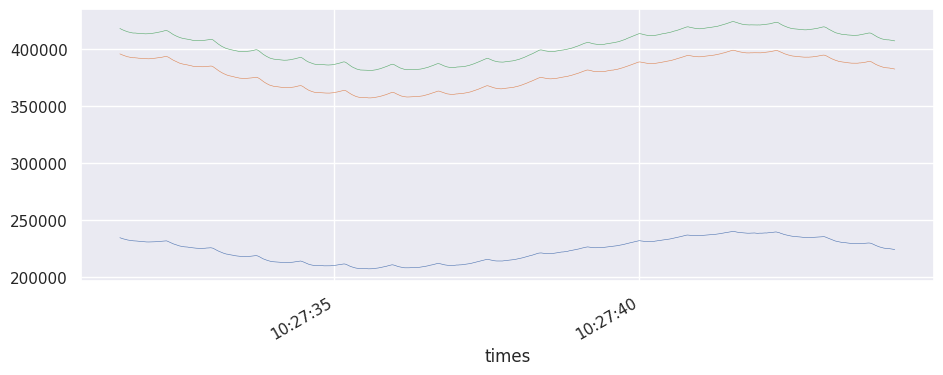

In [19]:
mplot = resting_verity['ppg0'][300:1000].plot(linewidth = 0.4)
mplot = resting_verity['ppg1'][300:1000].plot(linewidth = 0.4)
mplot = resting_verity['ppg2'][300:1000].plot(linewidth = 0.4)

# plt.subplot()
# plt.plot(resting_verity['ppg0'])
# plt.plot(resting_verity['ppg1'])
# plt.plot(resting_verity['ppg2'])
# plt.savefig('test.png')

In [20]:
# # mplot = resting_verity['ppg0'][170:220].plot(linewidth = 0.4)
# # mplot = resting_verity['ppg1'][170:220].plot(linewidth = 0.4)
# # mplot = resting_verity['ppg2'][170:220].plot(linewidth = 0.4)
# mplot = resting_verity['ppg0'][160:200].plot()
# mplot = resting_verity['ppg1'][160:200].plot()
# mplot = resting_verity['ppg2'][160:200].plot()

# plt.subplot()
# plt.plot(resting_verity['ppg0'][160:200],linewidth = 0.4)
# plt.plot(resting_verity['ppg1'][160:200], linewidth = 0.4)
# plt.plot(resting_verity['ppg2'][160:200], linewidth = 0.4)
# plt.savefig('test.png')

In [21]:
# # mplot = resting_verity['ppg0'][170:220].plot(linewidth = 0.4)
# # mplot = resting_verity['ppg1'][170:220].plot(linewidth = 0.4)
# # mplot = resting_verity['ppg2'][170:220].plot(linewidth = 0.4)
# mplot = resting_verity['ppg0'][210:220].plot()
# mplot = resting_verity['ppg1'][210:220].plot()
# mplot = resting_verity['ppg2'][210:220].plot()

# plt.subplot()
# plt.plot(resting_verity['ppg0'][210:220], '.')
# plt.plot(resting_verity['ppg1'][210:220], 's')
# plt.plot(resting_verity['ppg2'][210:220], '*')
# plt.savefig('test2.png')

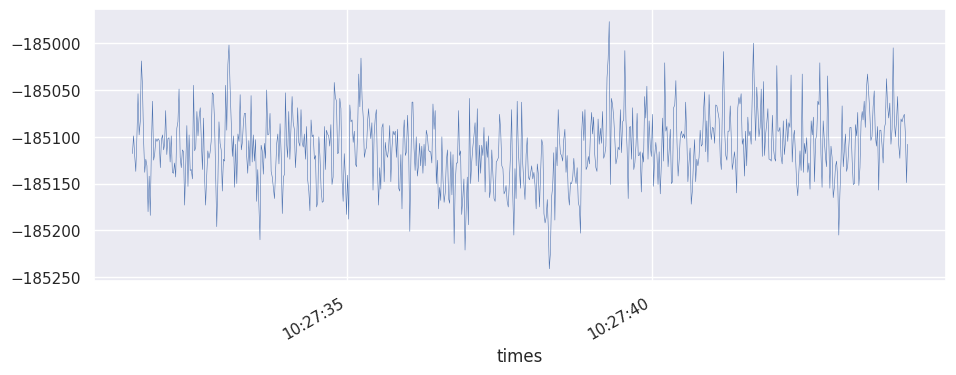

In [22]:
mplot = resting_verity['ambient'][300:1000].plot(linewidth = 0.4)

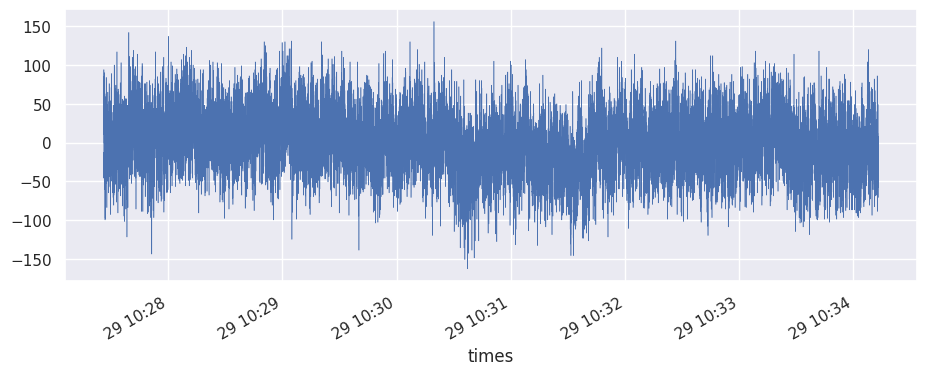

In [23]:
ambient_mean = resting_verity['ambient'].mean()
ambient_balance = resting_verity['ambient']-ambient_mean
mplot = ambient_balance.plot(linewidth = 0.4)

In [24]:
ppg0_mean = resting_verity['ppg0'].mean()
ppg1_mean = resting_verity['ppg1'].mean()
ppg2_mean = resting_verity['ppg2'].mean()

ppg0_balance1 = resting_verity['ppg0']-ppg0_mean
ppg1_balance1 = resting_verity['ppg1']-ppg1_mean
ppg2_balance1 = resting_verity['ppg2']-ppg2_mean
ppg0_balance_amb = ppg0_balance1 - ambient_balance
ppg1_balance_amb = ppg1_balance1 - ambient_balance
ppg2_balance_amb = ppg2_balance1 - ambient_balance

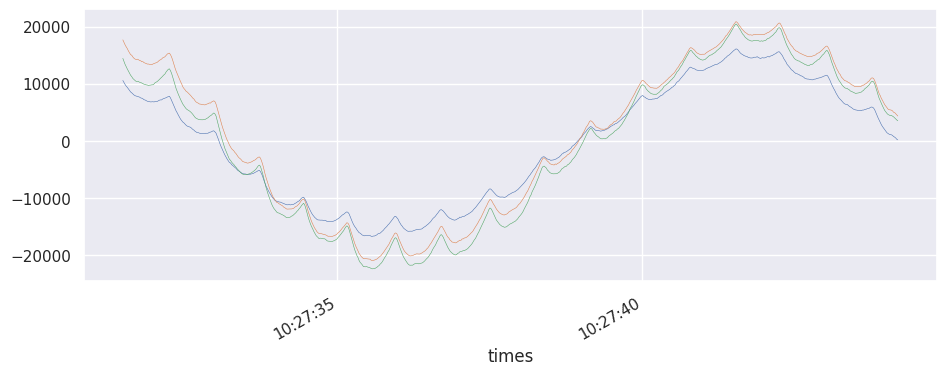

In [25]:
mplot = ppg0_balance1[300:1000].plot(linewidth = 0.4) 
mplot = ppg1_balance1[300:1000].plot(linewidth = 0.4) 
mplot = ppg2_balance1[300:1000].plot(linewidth = 0.4)

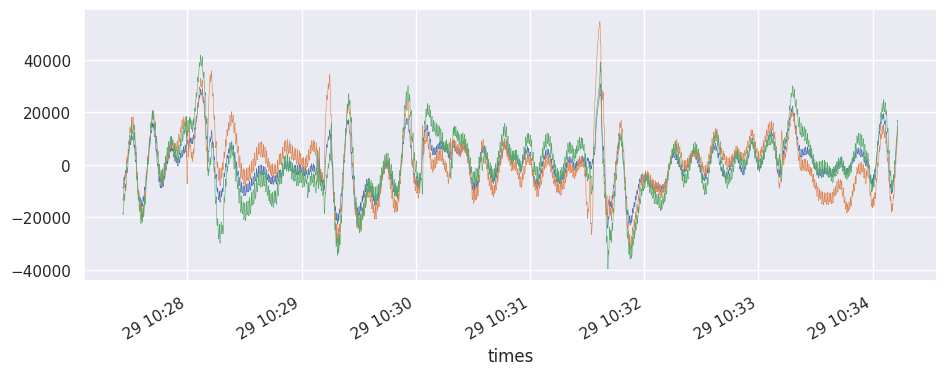

In [26]:
mplot = ppg0_balance_amb.plot(linewidth = 0.4) 
mplot = ppg1_balance_amb.plot(linewidth = 0.4) 
mplot = ppg2_balance_amb.plot(linewidth = 0.4)

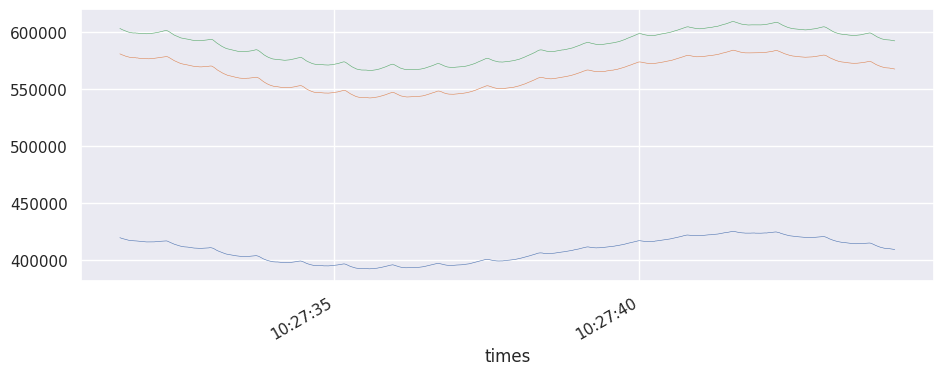

In [27]:
#pre subtracing version

mplot = (resting_verity['ppg0']-resting_verity['ambient'])[300:1000].plot(linewidth = 0.4)
mplot = (resting_verity['ppg1']-resting_verity['ambient'])[300:1000].plot(linewidth = 0.4)
mplot = (resting_verity['ppg2']-resting_verity['ambient'])[300:1000].plot(linewidth = 0.4)

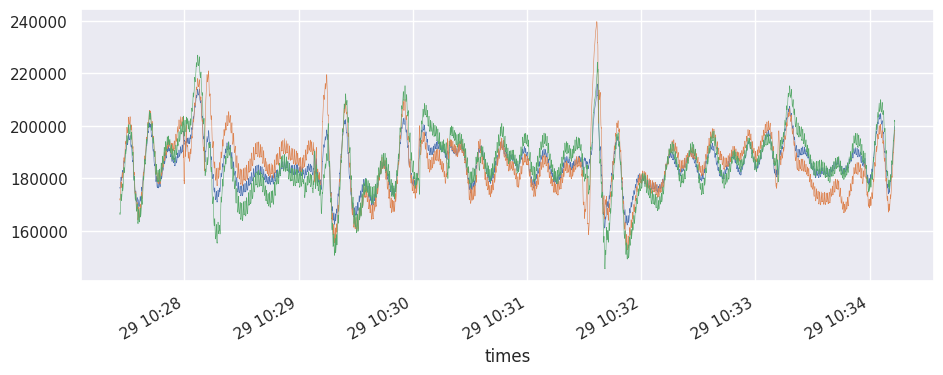

In [28]:
mplot = ((resting_verity['ppg0']-resting_verity['ambient'])-(resting_verity['ppg0']).mean()).plot(linewidth = 0.4)
mplot = ((resting_verity['ppg1']-resting_verity['ambient'])-(resting_verity['ppg1']).mean()).plot(linewidth = 0.4)
mplot = ((resting_verity['ppg2']-resting_verity['ambient'])-(resting_verity['ppg2']).mean()).plot(linewidth = 0.4)

In [29]:
ppg0_spectrum = np.fft.rfft(ppg0_balance1)
ppg1_spectrum = np.fft.rfft(ppg1_balance1)
ppg2_spectrum = np.fft.rfft(ppg2_balance1)

<StemContainer object of 3 artists>

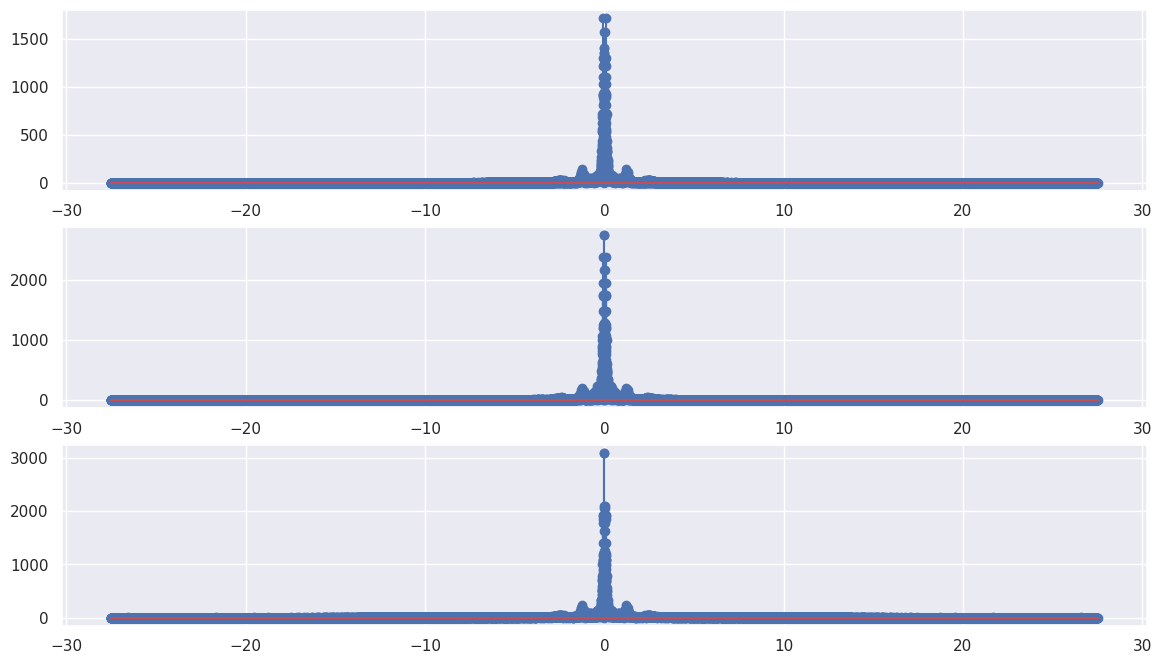

In [30]:
#verity 

fs = rest_verity_fs
length = len(ppg0_balance1)
f = np.linspace(-(fs / 2), fs / 2, length)

ppg0_fft = np.fft.fft(ppg0_balance1)/len(ppg0_balance1)
ppg1_fft = np.fft.fft(ppg1_balance1)/len(ppg1_balance1)
ppg2_fft = np.fft.fft(ppg2_balance1)/len(ppg2_balance1)

ppg0_fft_m = abs(ppg0_fft)
ppg1_fft_m = abs(ppg1_fft)
ppg2_fft_m = abs(ppg2_fft)
plt.figure(figsize=(14,8))

plt.subplot(3, 1, 1)
plt.stem(f, np.fft.fftshift(ppg0_fft_m))

plt.subplot(3, 1, 2)
plt.stem(f, np.fft.fftshift(ppg1_fft_m))

plt.subplot(3, 1, 3)
plt.stem(f, np.fft.fftshift(ppg2_fft_m))

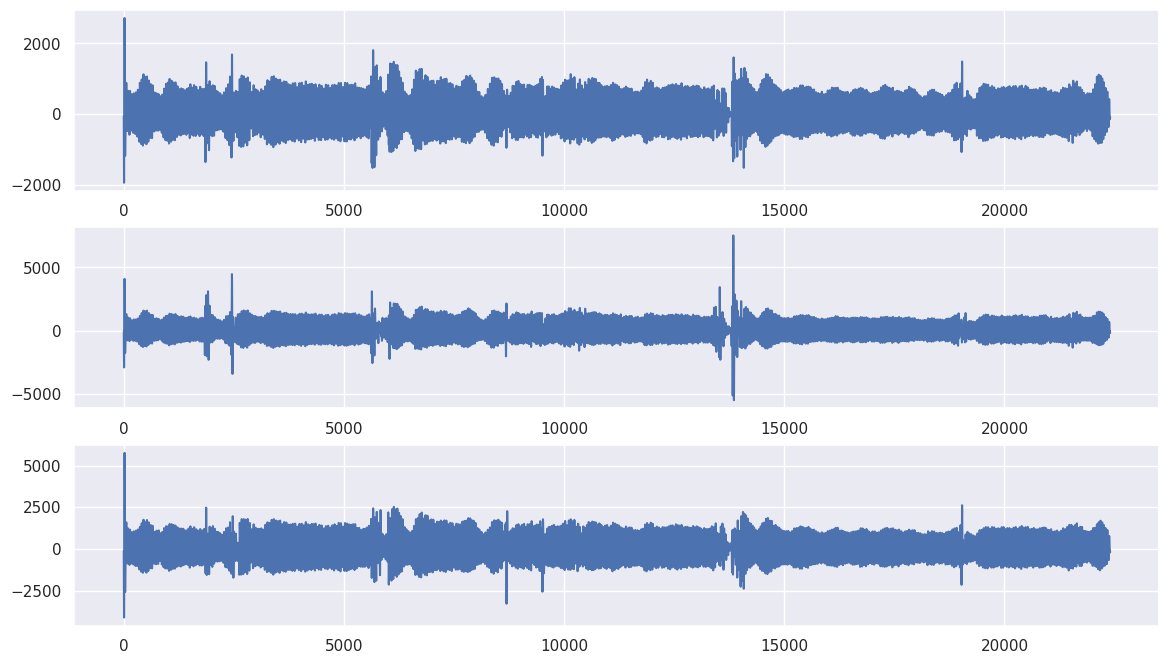

In [63]:
fs = rest_verity_fs
length = len(ppg0_balance1)
# 파라미터 계수 N
order = 2
#cutoff Wn
# cutoff = [fs*0.03,fs/2*0.97]
cutoff = [1.5,3]
ts = 1/ fs
Nyq = fs / 2

sos = signal.butter(order, cutoff, btype='bandpass', output = 'sos', fs = fs)

ppg0_filtered = signal.sosfilt(sos, ppg0_balance1)
ppg1_filtered = signal.sosfilt(sos, ppg1_balance1)
ppg2_filtered = signal.sosfilt(sos, ppg2_balance1)

plt.figure(figsize=(14,8))

plt.subplot(3, 1, 1)
plt.plot(ppg0_filtered)
# plt.scatter(resting_verity['idx'], ppg0_filtered)

plt.subplot(3, 1, 2)
plt.plot(ppg1_filtered)
# plt.scatter(resting_verity['idx'], ppg1_filtered)

plt.subplot(3, 1, 3)
plt.plot(ppg2_filtered)
# plt.plot(f, ppg2_filtered)
# plt.scatter(resting_verity['idx'], ppg2_filtered)



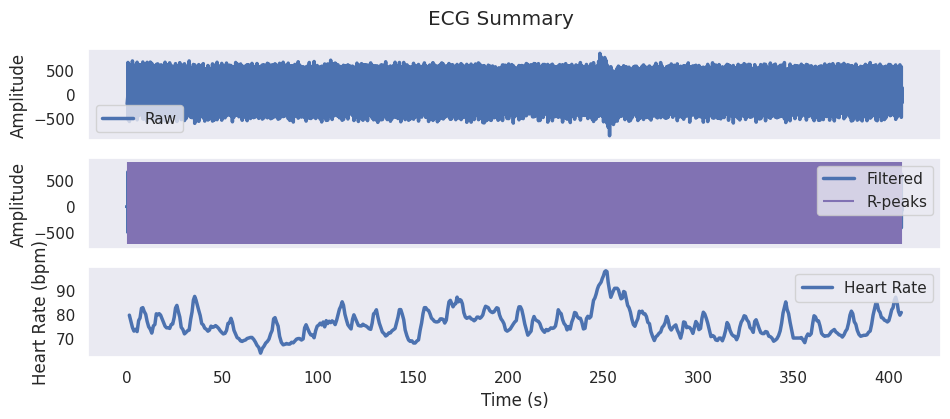

In [32]:
signal0 = resting_h10['sensor']
out = ecg.ecg(signal=signal0, sampling_rate=130., show=True)

In [21]:
print(out.keys())

['ts', 'filtered', 'rpeaks', 'templates_ts', 'templates', 'heart_rate_ts', 'heart_rate']


In [22]:
signal, rpeaks = biosppy.signals.ecg.ecg(signal= resting_h10['sensor'], sampling_rate = 130, show=False)[1:3]
nni = tools.nn_intervals(rpeaks)
print(rpeaks)
print(nni)
print(len(nni))

[  60  139  223  307  389  472  558  643  727  812  896  983 1067 1149
 1230 1313 1396 1478 1558 1639 1719 1799 1878 1956 2035 2115 2196 2277]
[79. 84. 84. 82. 83. 86. 85. 84. 85. 84. 87. 84. 82. 81. 83. 83. 82. 80.
 81. 80. 80. 79. 78. 79. 80. 81. 81.]
27


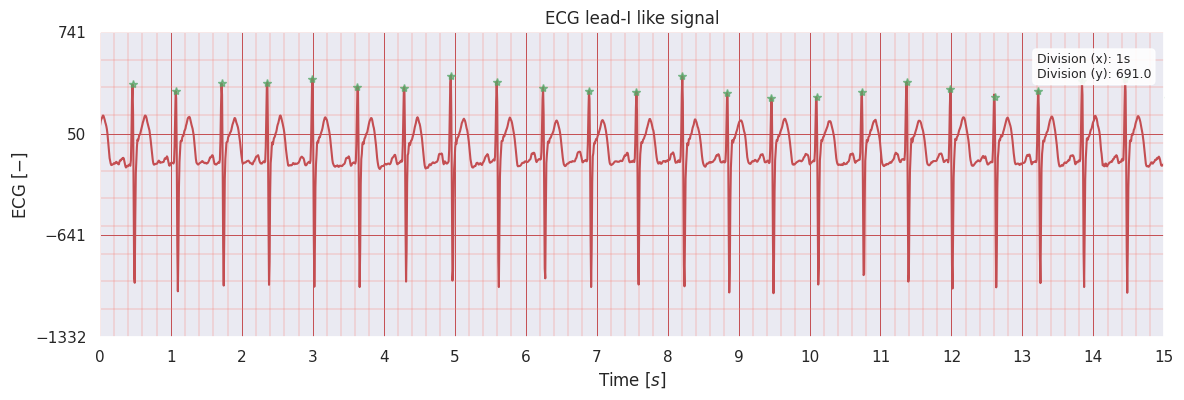

ReturnTuple(ecg_plot=<Figure size 1200x400 with 1 Axes>)

In [23]:
tools.plot_ecg(signal = resting_h10['sensor'], sampling_rate = 130,interval=[0, 15])

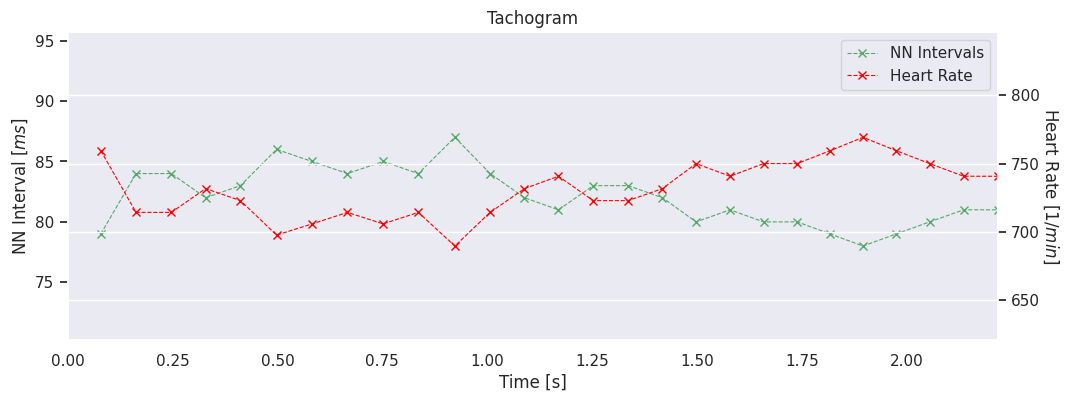

ReturnTuple(tachogram_plot=<Figure size 1200x400 with 2 Axes>)

In [33]:
tools.tachogram(signal = resting_h10['sensor'], 
                nni = nni, 
                rpeaks = rpeaks, 
                sampling_rate = 130,
                interval=[0, 1200]
               )

KeyError: None

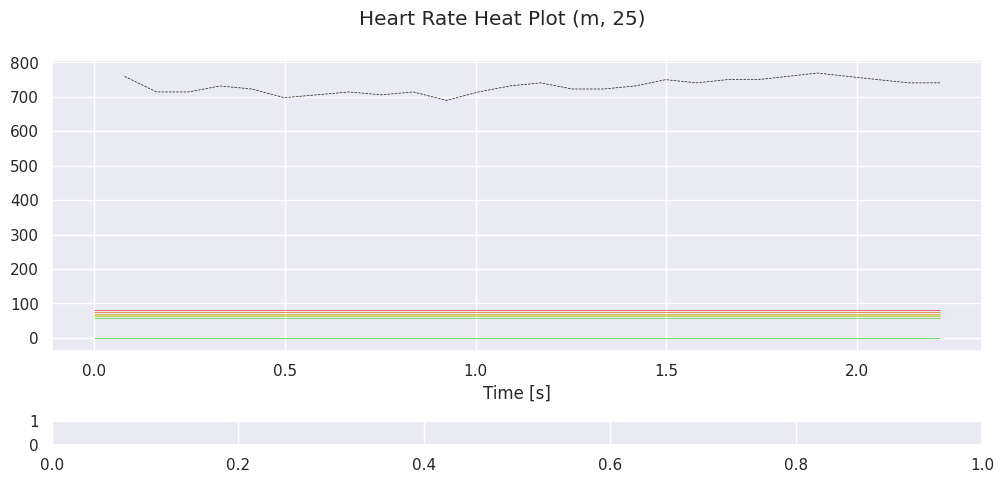

In [35]:
tools.heart_rate_heatplot(
                signal = resting_h10['sensor'], 
                nni = nni, 
                rpeaks = rpeaks, 
                age = 25,
                gender = 'm',
                sampling_rate = 130,
                # interval=[0, 15]
               )

nni_counter: 27
nni_mean: 82.11111111111111
nni_min: 78.0
nni_max: 87.0
hr_mean: 731.2960838220749
hr_min: 689.6551724137931
hr_max: 769.2307692307693
hr_std: 20.935597176281775
nni_diff_mean: 1.3846153846153846
nni_diff_min: 0
nni_diff_max: 5
sdnn: 2.3588350014578308
sdnn_index: nan
sdann: nan
rmssd: 1.775907135479261
sdsd: 1.1340872303988991
nn50: 0
pnn50: 0.0
nn20: 0
pnn20: 0.0
nni_histogram: Figure(600x600)
tinn_n: 70.3125
tinn_m: 85.9375
tinn: 15.625
tri_index: 1.125


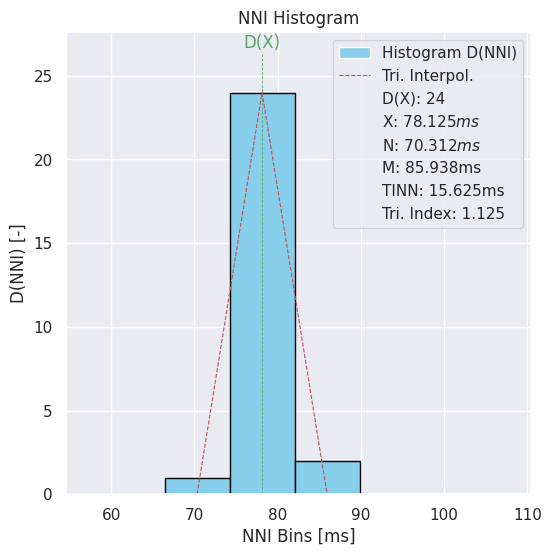

In [68]:
result = td.time_domain(nni)
for i in result.keys():
    print(f'{i}: {result[i]}', )

In [81]:
rpeaks = biosppy.signals.ecg.christov_segmenter(signal=resting_h10['sensor'], sampling_rate=130)
print(rpeaks)

ReturnTuple(rpeaks=array([  60,  139,  223,  307,  389,  472,  557,  643,  727,  812,  896,
        983, 1067, 1149, 1230, 1313, 1396, 1478, 1558, 1638, 1719, 1799,
       1878, 1956, 2035, 2114, 2196, 2277]))


In [105]:
hr = biosppy.signals.ecg.extract_heartbeats(signal=resting_h10['sensor'], 
                                            rpeaks=rpeaks[0], 
                                            sampling_rate=130, 
                                            before=0.2, after=0.4)

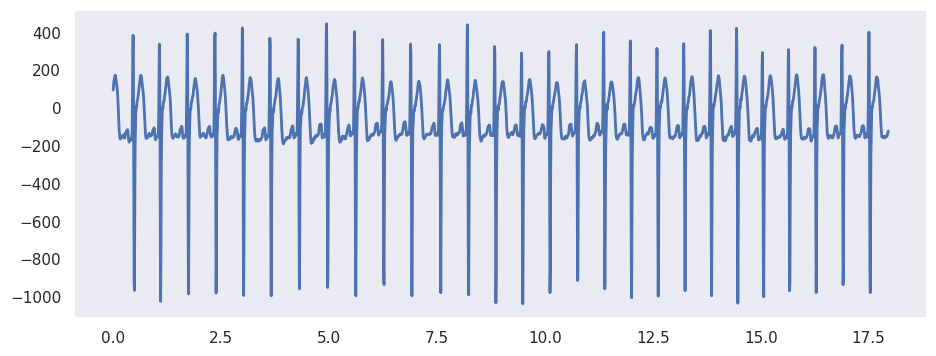

In [68]:
import pylab as pl
from biosppy import storage

# signal, mdata = storage.load_txt('.../examples/ecg.txt')
Fs = 130
N = len(resting_h10['sensor'])  # number of samples
T = (N - 1) / Fs  # duration
ts = np.linspace(0, T, N, endpoint=False)  # relative timestamps
pl.plot(ts, signal, lw=2)
pl.grid()
pl.show()

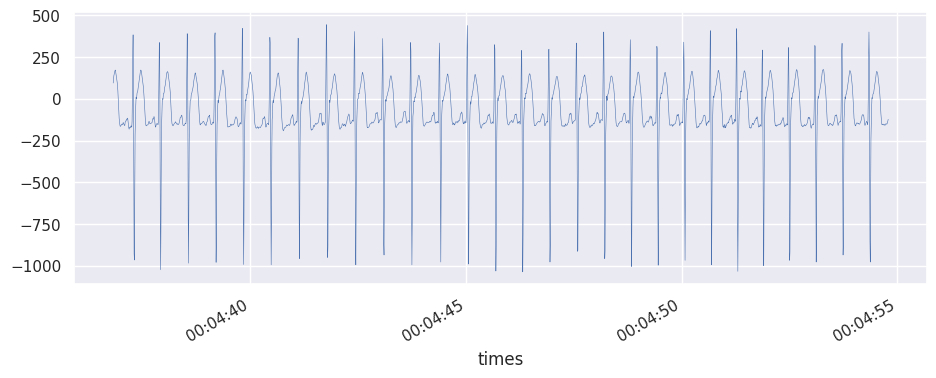

In [52]:
mplot = resting_h10['sensor'].plot(linewidth = 0.4)
mplot = rpeaks

-76.99871575342466


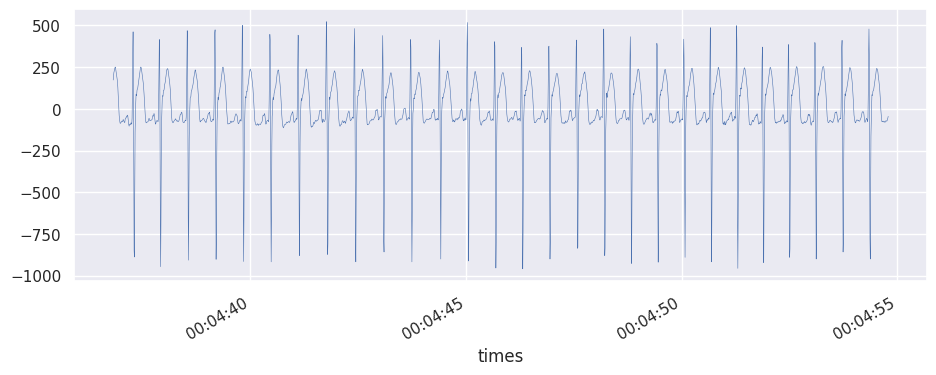

In [106]:
h_mean = resting_h10['sensor'].mean()
print(h_mean)
h_balance = resting_h10['sensor']-h_mean
mplot = h_balance.plot(linewidth = 0.4)

<StemContainer object of 3 artists>

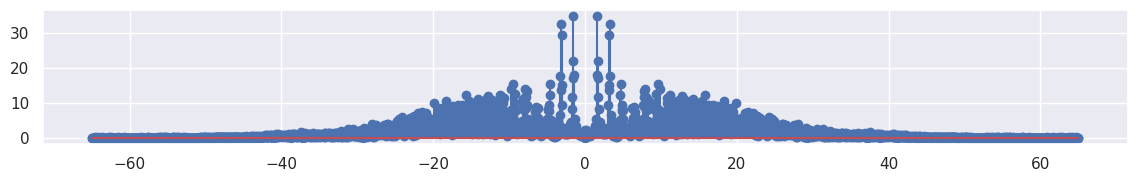

In [55]:
fs = rest_h10_fs
ts = 1/ fs
Nyq = fs / 2
length = len(h_balance)
f = np.linspace(-(fs / 2), fs / 2, length)

h10_fft = np.fft.fft(h_balance)/len(h_balance)
h10_fft_m = abs(h10_fft)
plt.figure(figsize=(14,8))
plt.subplot(4, 1, 1)
plt.stem(f, np.fft.fftshift(h10_fft_m))


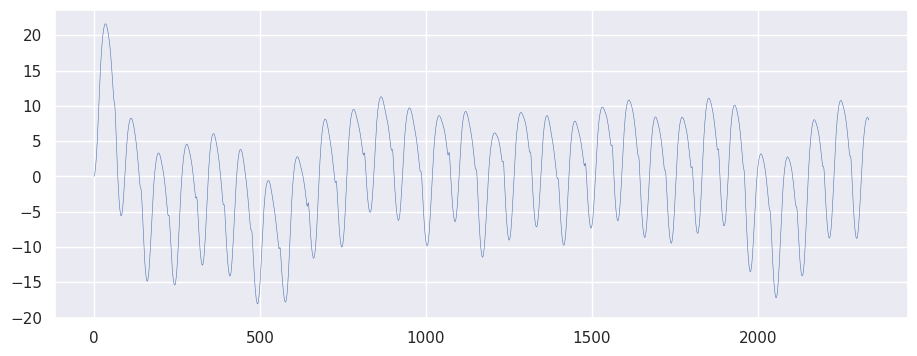

In [57]:
# 파라미터 계수 N
order = 2
#cutoff Wn
cutoff = [0.05,0.5]
ts = 1/ fs
Nyq = fs / 2
length = len(h_balance)
sos = signal.butter(order, cutoff,btype='bandpass', output = 'sos', fs = fs)
h10_filtered = signal.sosfilt(sos, h_balance)
# plt.plot(h10_filtered)
plt.plot(h10_filtered, linewidth=0.4)

In [267]:
# polar h10 ECG time domain features
time_domain = {
    #정상 범위 350~1500
    'mean_nni': 0,
    # 분포에서 20% 이상 날때 abnomal 판단(20%의 기준이 애매 재확인 필요)
    'sdnn': 0,
    #sd of diffrences between adjacent NN intervals
    'sdsd': 0,
    'nni_50': 0,
    'pnni_50': 0,
    'rmssd': 0,
    'median_nni': 0,
    'range_nni': 0,
    'cvsd': 0,
    'cvnni': 0,
    # 60초 내 횟수
    'mean_hr': 90,
    'max_hr': 140,
    'min_hr': 60,
    'std_hr': 15
}
# polar h10 ECG Frequency domain features
h10_param = ['RR', 'HRV_score', 'RMSSD', 'SDNN', 'pNN50', 'LF', 'HF', 'LF/HF')
# polar h10 ECG nonlinear domain features

SyntaxError: unterminated string literal (detected at line 8) (507047739.py, line 8)

In [ ]:
스트레스 지수 계산식


